### You are interviewing for a new Data Science postion at a new firm. On your second interview you are given a take home assignment to classify a a data set. Since you are not an employee just yet the company as provided you classified data that has not been lable, meaning, the columns are not labled. You will need to use K-Nearest Neighbors to Classifiy the data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
classfied = pd.read_csv("resources/KNN_Project_Data")

In [7]:
classfied

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290,0
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545,1
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912,1
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020,1


### scale data 

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scalar = StandardScaler()

In [10]:
scalar.fit(classfied.drop("TARGET CLASS", axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scalar.transform(classfied.drop("TARGET CLASS", axis = 1))

In [14]:
scaled_feat_df = pd.DataFrame(scaled_features, columns=classfied.columns[:-1])

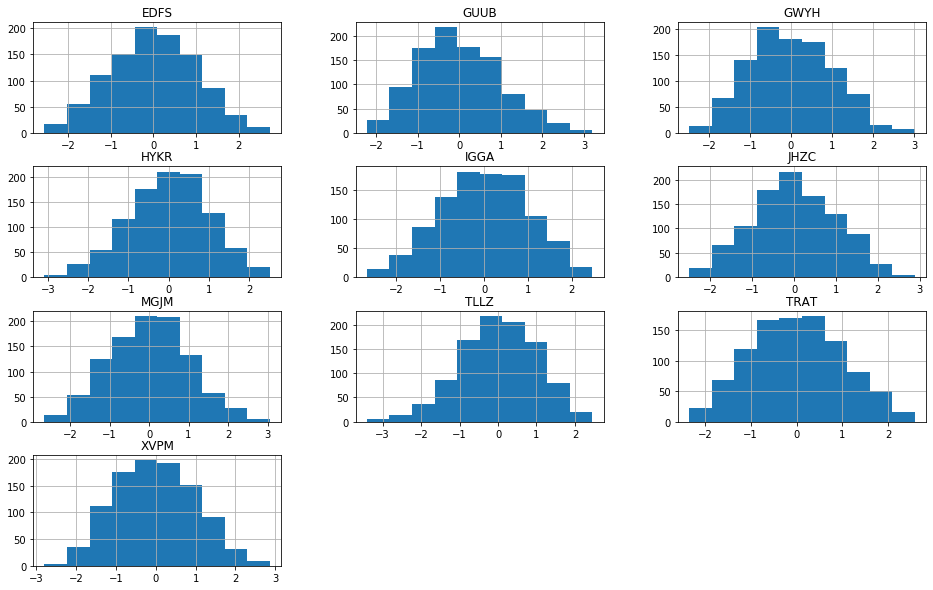

In [19]:
scaled_feat_df.hist(figsize = (16,10));

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [22]:
scaled_feat_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [23]:
X = scaled_feat_df
y = classfied["TARGET CLASS"]

In [24]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [28]:
predict = knn.predict(X_test)

In [29]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [30]:
print(confusion_matrix(y_test,predict))

[[109  43]
 [ 41 107]]


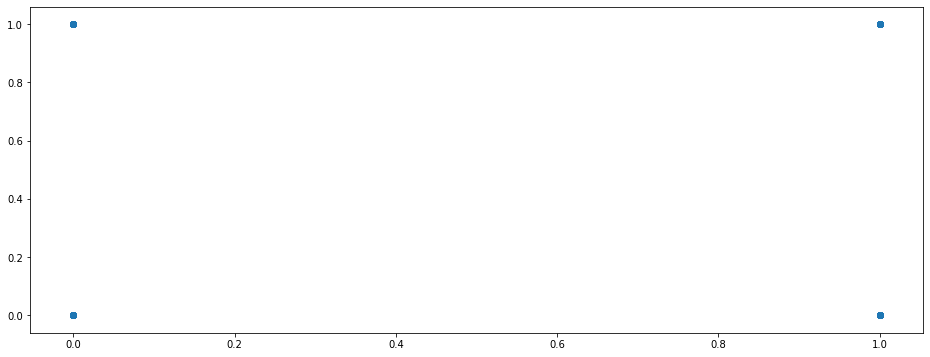

In [33]:
plt.figure(figsize=(16,6))
plt.scatter(y_test, predict);

### improve using elbow method

In [34]:
error_Rate = []
for i in range(1,40):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,y_train)
    pred = kn.predict(X_test)
    error_Rate.append(np.mean(y_test != pred))
    

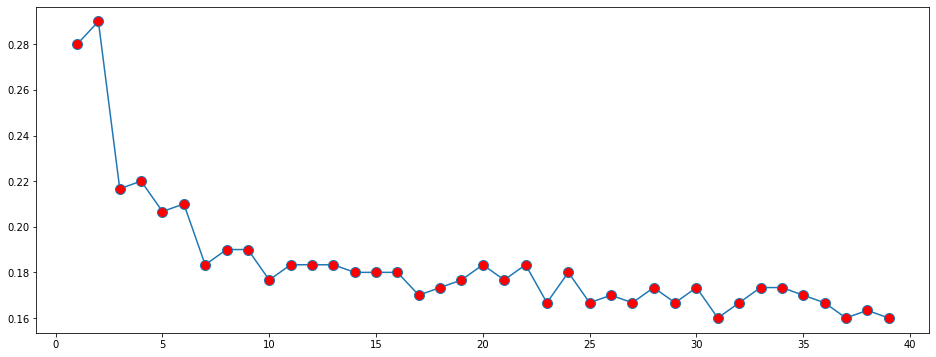

In [42]:
plt.figure(figsize=(16,6))
plt.plot(range(1,40), error_Rate, marker = "o", mfc = "r", ms = 10);

### Looks like a K of 37 would have a lower error rate

In [43]:
kNN = KNeighborsClassifier(n_neighbors=37)

In [44]:
kNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

In [45]:
predictt = kNN.predict(X_test)

In [46]:
print(classification_report(y_test,predictt))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       152
           1       0.82      0.86      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [47]:
print(confusion_matrix(y_test,predictt))

[[125  27]
 [ 21 127]]
